<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Initial-Thoughts-and-Response-to-the-Business-Problem" data-toc-modified-id="Initial-Thoughts-and-Response-to-the-Business-Problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial Thoughts and Response to the Business Problem</a></span></li><li><span><a href="#Importing-Modules-and-Opening-Relevant-DataFrames" data-toc-modified-id="Importing-Modules-and-Opening-Relevant-DataFrames-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing Modules and Opening Relevant DataFrames</a></span></li><li><span><a href="#Box-Office-Gross" data-toc-modified-id="Box-Office-Gross-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Box Office Gross</a></span></li><li><span><a href="#Title-Basics" data-toc-modified-id="Title-Basics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Title Basics</a></span></li><li><span><a href="#Sorting-and-Refining-Data-by-Genre" data-toc-modified-id="Sorting-and-Refining-Data-by-Genre-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sorting and Refining Data by Genre</a></span></li><li><span><a href="#Exploring-the-Correlation-Between-Critical-and-Commercial-Success" data-toc-modified-id="Exploring-the-Correlation-Between-Critical-and-Commercial-Success-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exploring the Correlation Between Critical and Commercial Success</a></span></li><li><span><a href="#Examining-ROI-by-Genre" data-toc-modified-id="Examining-ROI-by-Genre-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Examining ROI by Genre</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#For-Further-Exploration" data-toc-modified-id="For-Further-Exploration-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>For Further Exploration</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Daniel Ross-Leutwyler
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 8/12/21
* Instructor name: James Irving
* Blog post URL:


## Overview

In this project I will make suggestions about what sort of movies Microsoft should begin making for the launch of their movie studio.  I will use the provided dataset, supplemented when needed by other publicly available datasets, cleaning and collating it as necessary, and making plots and charts that we can make inferences from.

## Initial Thoughts and Response to the Business Problem

**"Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create."**

There are lots of metrics to measure success, some are easier to objectively measure than others. With the data at hand the two main ways to judge the success of a movie are through analyzing key financial metrics (gross box office, and return-on-investment, for example), and critical response (as aggregated by the IMBD website). 

By analyzing what, if any, attributes the top grossing movies all share, we can make informed suggestions about what sort of film Microsoft should pursue.

I will also explore the relationship between genre, budget, and gross revenue. The success of a blockbuster is in part dependent upon its ROI, as well.

The analysis performed here will attempt to answer these three questions:

1) What are the highest grossing genres from 2010-2018?

2) What genres have the highest ROI, over that same time frame?

3) Does a higher budget necessarily correlate with a higher ROI?

## Importing Modules and Opening Relevant DataFrames

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppressing scientific notation, and adding ',' to long values for legibility
pd.options.display.float_format = '{:,.2f}'.format
# setting sns context to talk for clarity and size
sns.set_context('talk')

These are the data sets are relevant to answering the stakeholder questions.

In [42]:
# creating variables to call for opening csv
box_office_gross = 'zippedData/bom.movie_gross.csv'
title_basics = 'zippedData/imdb.title.basics.csv'
ratings_url = 'zippedData/imdb.title.ratings.csv.gz'
budget_url = 'zippedData/tn.movie_budgets.csv'

These data sets are not relevant to the business question, either due to lack of crossover/compatibility with other sets, outdated or incomplete data, or containing data that is beyond the scope of our business question.

imdb.name.basics.csv
imbd.title.akas.csv\
imdb.title.crew.csv\
imdb.principles.csv\
rt.movie_info.tsv\
rt.reviews.tsv\
tmdb.movies.csv


## Box Office Gross

Preliminary EDA on bom.movie_gross.csv

In [43]:
def prelim(df):
    """displays core information
    on a dataframe at the beginning of EDA
    
    accepts a DataFrame as input, and displays
    the head, info, and sum of all null values
    for each column in that DataFrame
    """
    return (display(df.head()), 
            display(df.info()), 
            display(df.isna().sum()))

In [44]:
gross_df = pd.read_csv(box_office_gross)
prelim(gross_df)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

(None, None, None)

gross_df is a DataFrame of movies from 2011-2018. Each row represents one movie, and each column contains the the following values:

***'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.***

There are no null entries in the ***title*** column, which contains objects.

There are 5 null entries in the ***studio*** column, which contains objects.

There are 28 null values in the ***domestic_gross*** column, which contains numbers, specifically floats.

There are 1350 null values in the ***foreign_gross*** column, which contains objects, and will need to be cast as a float. The null values will need to be replaced.

***hypothesis: foreign_gross should be summed with domestic_gross, as the global nature of media today makes the foreign/domestic binary less important. ***

There are no nulls in the ***year*** column, which contains integers. 

Examining the 'foreign_gross' column:

In [45]:
# identifying existing ',' in the strings that needs to be replaced
gross_df['foreign_gross'].str.contains(',').sum()

5

In [46]:
# removing commas to be able to cast as float and sanity check
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','')
gross_df['foreign_gross'] = gross_df['foreign_gross'].astype(float)
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [47]:
# small function to look at the rows with null values
def see_nans(df, cols=None): 
    """accepts a data frame, and optionally columns
    returns a data frame of all null values.
    
    Used for previewing missing data.
    Does not alter df in any way"""
    
    if cols is None:
        cols = df.columns
    return df[df[cols].isnull().any(axis=1)]

see_nans(gross_df, ['foreign_gross']).head(20)

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,"1,800,000.00",nan,2010
254,The Polar Express (IMAX re-issue 2010),WB,"673,000.00",nan,2010
267,Tiny Furniture,IFC,"392,000.00",nan,2010
269,Grease (Sing-a-Long re-issue),Par.,"366,000.00",nan,2010
280,Last Train Home,Zeit.,"288,000.00",nan,2010
287,Sweetgrass,CGld,"207,000.00",nan,2010
291,Casino Jack and the United States of Money,Magn.,"177,000.00",nan,2010
308,Alamar,FM,"61,600.00",nan,2010
311,Hatchet 2,Vita.,"52,600.00",nan,2010
319,Living in Emergency,Truly,"32,200.00",nan,2010


A cursory search of the foreign box office receipts for several movies on this list demonstrates that while some of these movies did not have a foreign theatrical release (Flipped), it appears that some of the movies foreign box office receipts have already been counted in the domestic gross category (Courageous), and others have simply had that info omitted. On balance, the movies missing the foreign_gross data are not on the upper end of the the domestic_gross category, rendering their relevance minimal. I will replace all the Nan values in this column with 0.

In [48]:
# replacing NaNs with 0 and sanity check
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0)
see_nans(gross_df, ['foreign_gross']).head()

,title,studio,domestic_gross,foreign_gross,year


In [49]:
# exploring the difference in domestic and foreign gross
print(f"The domestic gross sum is: ${round(gross_df['domestic_gross'].sum()):,}")
print(f"The domestic gross mean is: ${round(gross_df['domestic_gross'].mean()):,}")
print(f"The foreign gross sum is: ${round(gross_df['foreign_gross'].sum()):,}")
print(f"The foreign gross mean is: ${round(gross_df['foreign_gross'].mean()):,}")

The domestic gross sum is: $96,557,293,580.0
The domestic gross mean is: $28,745,845.0
The foreign gross sum is: $152,515,914,276.0
The foreign gross mean is: $45,029,795.0


Above we can see that the both the total foreign box office receipts (even with the 1350 replaced data points) and the foreign box office mean are ***higher*** than domestic.

This means it ***may*** warrant giving special consideration to movies that performed well in foreign markets.

I will also add an additional column for total_gross summing the domestic and foreign columns, as this is a feature that is absent in the original data.

In [50]:
gross_df['total_gross'] = (gross_df['domestic_gross'] + gross_df['foreign_gross'])
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,"415,000,000.00","652,000,000.00",2010,"1,067,000,000.00"
1,Alice in Wonderland (2010),BV,"334,200,000.00","691,300,000.00",2010,"1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00","664,300,000.00",2010,"960,300,000.00"
3,Inception,WB,"292,600,000.00","535,700,000.00",2010,"828,300,000.00"
4,Shrek Forever After,P/DW,"238,700,000.00","513,900,000.00",2010,"752,600,000.00"


In [51]:
# breaking out new dfs to explore how domestic, foreign, and total compare
top_100_domestic = gross_df.sort_values('domestic_gross', ascending=False)[:100]
top_100_foreign = gross_df.sort_values('foreign_gross', ascending=False)[:100]
top_100_total = gross_df.sort_values('total_gross', ascending=False)[:100]

display(top_100_domestic.head())
display(top_100_foreign.head())
display(top_100_total.head())

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,"381,000,000.00","960,500,000.00",2011,"1,341,500,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
3081,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
1127,Frozen,BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
328,Harry Potter and the Deathly Hallows Part 2,WB,"381,000,000.00","960,500,000.00",2011,"1,341,500,000.00"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"


It is clear from looking at the top_100_domestic films sorted by domestic_gross (top table) that the foreign_gross values are incorrect. It is not possible that there were only $1,131 of receipts for Star Wars the Force Awakens, and imdb confirms this.

Exploring incorrect values in the foreign_gross column:

In [52]:
top_100_domestic.sort_values('foreign_gross').head(6)

,title,studio,domestic_gross,foreign_gross,year,total_gross
2760,The Fate of the Furious,Uni.,"226,000,000.00","1,010.00",2017,"226,001,010.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,019.40",2015,"652,301,019.40"
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,131.60",2015,"936,701,131.60"
1874,Furious 7,Uni.,"353,000,000.00","1,163.00",2015,"353,001,163.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369.50",2018,"678,801,369.50"
748,Dr. Seuss' The Lorax,Uni.,"214,000,000.00","134,800,000.00",2012,"348,800,000.00"


Ok, luckily we only have to manually scrape and replace the foreign gross box office receipts from 5 movies. Phew.

In [53]:
# creating dictionary to replace incorrect values.
# correct values taken from IMBD

mapping_dict = {1010.00 : 1009996733,
               1019.40 : 1018130819,
               1131.60 : 1132859475,
               1163.00 : 1162334379,
               1369.50 : 1369544272}

gross_df['foreign_gross'] = gross_df['foreign_gross'].replace(mapping_dict)

# also need to re-concatinate the total_gross to reflect the updated foreign_gross

gross_df['total_gross'] = (gross_df['domestic_gross'] + gross_df['foreign_gross'])

# recreating the top_100_x dataframes with the updated
# foreign receipt data

top_100_domestic = gross_df.sort_values('domestic_gross', ascending=False)[:100]
top_100_foreign = gross_df.sort_values('foreign_gross', ascending=False)[:100]
top_100_total = gross_df.sort_values('total_gross', ascending=False)[:100]

display(top_100_domestic.head(10))
display(top_100_foreign.head(10))
display(top_100_total.head(10))

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,132,859,475.00",2015,"2,069,559,475.00"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369,544,272.00",2018,"2,048,344,272.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,018,130,819.00",2015,"1,670,430,819.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
3082,Incredibles 2,BV,"608,600,000.00","634,200,000.00",2018,"1,242,800,000.00"
2323,Rogue One: A Star Wars Story,BV,"532,200,000.00","523,900,000.00",2016,"1,056,100,000.00"
2759,Beauty and the Beast (2017),BV,"504,000,000.00","759,500,000.00",2017,"1,263,500,000.00"
2324,Finding Dory,BV,"486,300,000.00","542,300,000.00",2016,"1,028,600,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_gross
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369,544,272.00",2018,"2,048,344,272.00"
1874,Furious 7,Uni.,"353,000,000.00","1,162,334,379.00",2015,"1,515,334,379.00"
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,132,859,475.00",2015,"2,069,559,475.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,018,130,819.00",2015,"1,670,430,819.00"
2760,The Fate of the Furious,Uni.,"226,000,000.00","1,009,996,733.00",2017,"1,235,996,733.00"
328,Harry Potter and the Deathly Hallows Part 2,WB,"381,000,000.00","960,500,000.00",2011,"1,341,500,000.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
3081,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"
1127,Frozen,BV,"400,700,000.00","875,700,000.00",2013,"1,276,400,000.00"


,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,"936,700,000.00","1,132,859,475.00",2015,"2,069,559,475.00"
3079,Avengers: Infinity War,BV,"678,800,000.00","1,369,544,272.00",2018,"2,048,344,272.00"
1873,Jurassic World,Uni.,"652,300,000.00","1,018,130,819.00",2015,"1,670,430,819.00"
727,Marvel's The Avengers,BV,"623,400,000.00","895,500,000.00",2012,"1,518,900,000.00"
1874,Furious 7,Uni.,"353,000,000.00","1,162,334,379.00",2015,"1,515,334,379.00"
1875,Avengers: Age of Ultron,BV,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00"
3080,Black Panther,BV,"700,100,000.00","646,900,000.00",2018,"1,347,000,000.00"
328,Harry Potter and the Deathly Hallows Part 2,WB,"381,000,000.00","960,500,000.00",2011,"1,341,500,000.00"
2758,Star Wars: The Last Jedi,BV,"620,200,000.00","712,400,000.00",2017,"1,332,600,000.00"
3081,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.00","891,800,000.00",2018,"1,309,500,000.00"


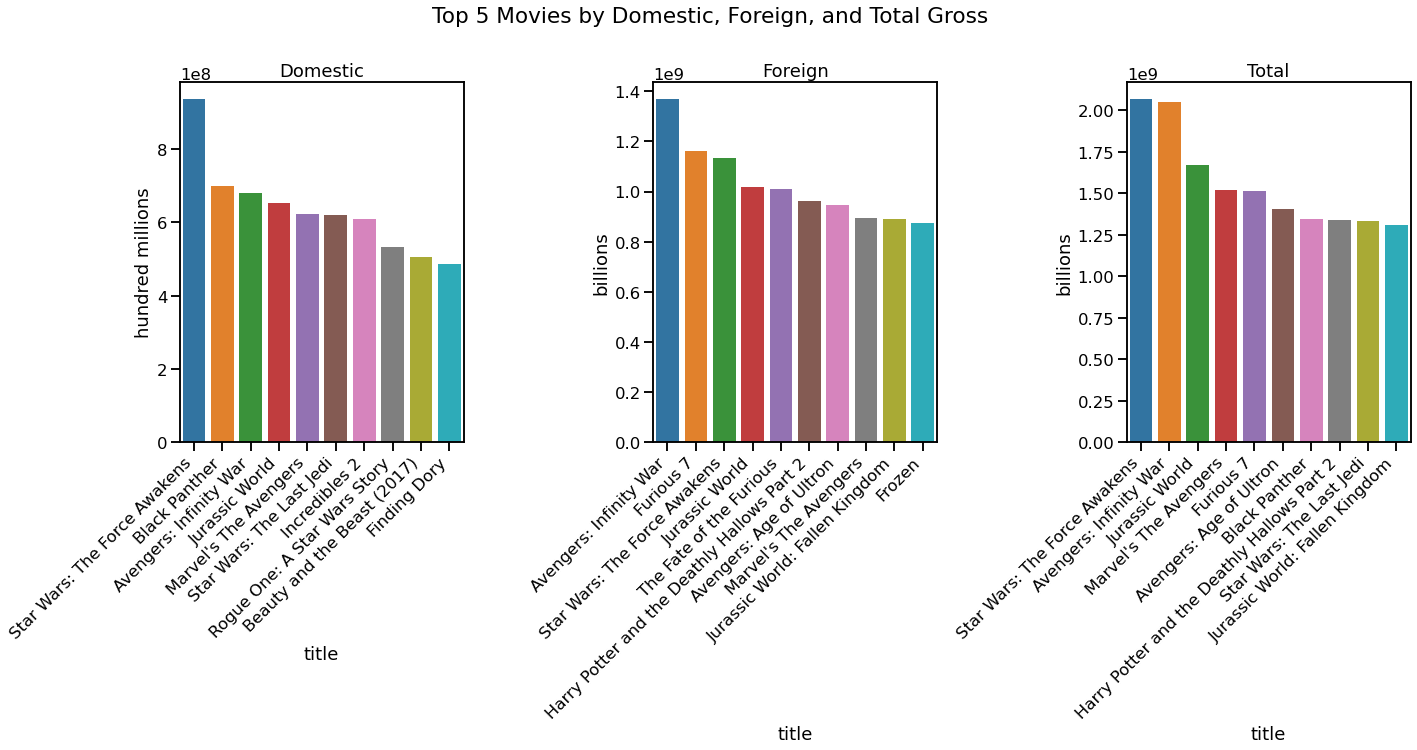

In [54]:
# plotting bar charts for the top 10 movies, by gross
fig, (ax1, ax2, ax3) = plt.subplots(1 ,3 , figsize=(20,10))

sns.barplot(data=top_100_domestic.head(10), x='title', y='domestic_gross', ax=ax1)
sns.barplot(data=top_100_foreign.head(10), x='title', y='foreign_gross', ax=ax2)
sns.barplot(data=top_100_total.head(10), x='title', y='total_gross', ax=ax3)

ax1.set_title('Domestic')
ax1.set_ylabel('hundred millions')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')

ax2.set_title('Foreign')
ax2.set_ylabel('billions')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right')

ax3.set_title('Total')
ax3.set_ylabel('billions')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Top 5 Movies by Domestic, Foreign, and Total Gross', y=1.05);

The selected data demonstrates that the top grossing movies between 2010-2018 are, overwhelmingly, part of a series. In fact, out of the top 10 by total sales only one movie, Black Panther, is not part of a series.

It is hard to make any recommendations based on this data. Both the Marvel and DC brands have strong existing relationships with particular studios, as do the Star Wars, Jurassic Park, Harry Potter, and Fast and Furious franchises. 

If there is an undiscovered gem of a series it may be worth investigating, but this facet of the industry is very competitive and saturated.

Combining this data frame with another that contains info about genre will allow for more direct suggestions to be made.

## Title Basics

Preliminary EDA on imdb.title.basics.csv

In [55]:
title_basics_df = pd.read_csv(title_basics)
prelim(title_basics_df)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

(None, None, None)

The title.basics table appears to contain a data frame primarily of movies from 2010-2021, but also with some titles from ***THE FUTURE***. Each row represents one movie, and contains columns with the following values:

'tconst', 'primary_title', 'original_title', 'start_year','runtime_minutes', 'genres'

There are no null entries in the tconst column, which is an object, as I would expect, and this column can be used as the index to ***join this df with other dfs that are similarly formatted.***

There are no null entries in the start_year column, which is an integer, as I would expect. ***This column will require cleaning to deal with movies from the future.***

There are significant null entires in the runtime_minutes column, which may be of questionable use. ***It may be worth exploring the relationship between movie length and box office success.***

There are 5408 null values in the genres column. This column will require more exploration as we will need it to help make decisions about what kind of movies Microsoft should be making.

Exploring the 'start_year' column:

In [56]:
title_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [57]:
# previewing movies from the future
title_basics_df[title_basics_df['start_year'] > 2021].sort_values('start_year',
                                                                  ascending=False,).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,nan,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,nan,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,nan,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,nan,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,nan,"Adventure,Family,Fantasy"


In [58]:
# we will set aside the movies from the future. There may be vaule in
# evaluating them by genre to see what is lined up in the future, but
# this evaluation would be supplementary to our primary question.
future_movies_df = title_basics_df.loc[title_basics_df['start_year'] > 2021]
title_basics_df = title_basics_df.loc[title_basics_df['start_year'] <= 2021]

# sanity check
title_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
Name: start_year, dtype: int64

## Sorting and Refining Data by Genre

At this point, to limit the scope of the data to evaluate, the title_basics_df and the gross_df should be merged.

In [59]:
display(title_basics_df.head())
display(gross_df.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,"415,000,000.00","652,000,000.00",2010,"1,067,000,000.00"
1,Alice in Wonderland (2010),BV,"334,200,000.00","691,300,000.00",2010,"1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00","664,300,000.00",2010,"960,300,000.00"
3,Inception,WB,"292,600,000.00","535,700,000.00",2010,"828,300,000.00"
4,Shrek Forever After,P/DW,"238,700,000.00","513,900,000.00",2010,"752,600,000.00"


There are two potential columns in the title_basics_df that we can use to merge: 'primary_title' and 'original_title'. Below are two different dfs that show us which column has more overlap with the gross_df.

In [60]:
df_orig = pd.merge(title_basics_df, gross_df, left_on='original_title',
              right_on='title')
df_pri = pd.merge(title_basics_df, gross_df, left_on='primary_title',
              right_on='title')
display(len(df_orig))
display(len(df_pri))

2776

3366

The 'primary_title' series has more overlap with gross_df. This is the merged df that we will use for the rest of our exploration.

Exploring the 'genre' column:

In [61]:
df_pri['genres'].value_counts()

Drama                      392
Documentary                168
Comedy,Drama,Romance       138
Comedy,Drama               137
Drama,Romance              115
                          ... 
Comedy,Crime,Horror          1
History                      1
Drama,Fantasy,Music          1
Documentary,Drama,Music      1
Comedy,Horror,Romance        1
Name: genres, Length: 331, dtype: int64

In [62]:
# splitting the genres into lists in a new column

df_split = df_pri.copy() 
df_split['genres_split'] = df_split['genres'].str.split(',')

# 'exploding' the 'genres_split' list to get multiple entries for each film by genre

df_split = df_split.explode('genres_split')

Now that the genre column has been cleaned to be more useful, it is possible to begin aggregate processes to explore the data.

In [63]:
# calculating the mean value by genre, dropping start_year for redundancy
df_genres = df_split.groupby('genres_split').mean().drop('start_year', axis=1)
df_genres = df_genres.sort_values('total_gross', ascending=False)
df_genres.reset_index(inplace=True)
df_genres.head()

,genres_split,runtime_minutes,domestic_gross,foreign_gross,year,total_gross
0,Sci-Fi,113.28,"108,388,534.78","187,542,935.91","2,014.11","297,286,477.46"
1,Adventure,109.62,"94,409,409.45","180,352,239.44","2,014.28","275,565,415.73"
2,Animation,94.81,"87,326,187.17","164,780,369.41","2,014.48","253,141,046.13"
3,Action,115.06,"58,418,156.98","110,789,452.11","2,014.07","170,161,263.67"
4,Fantasy,110.03,"52,777,121.02","105,152,258.19","2,014.11","158,519,448.86"


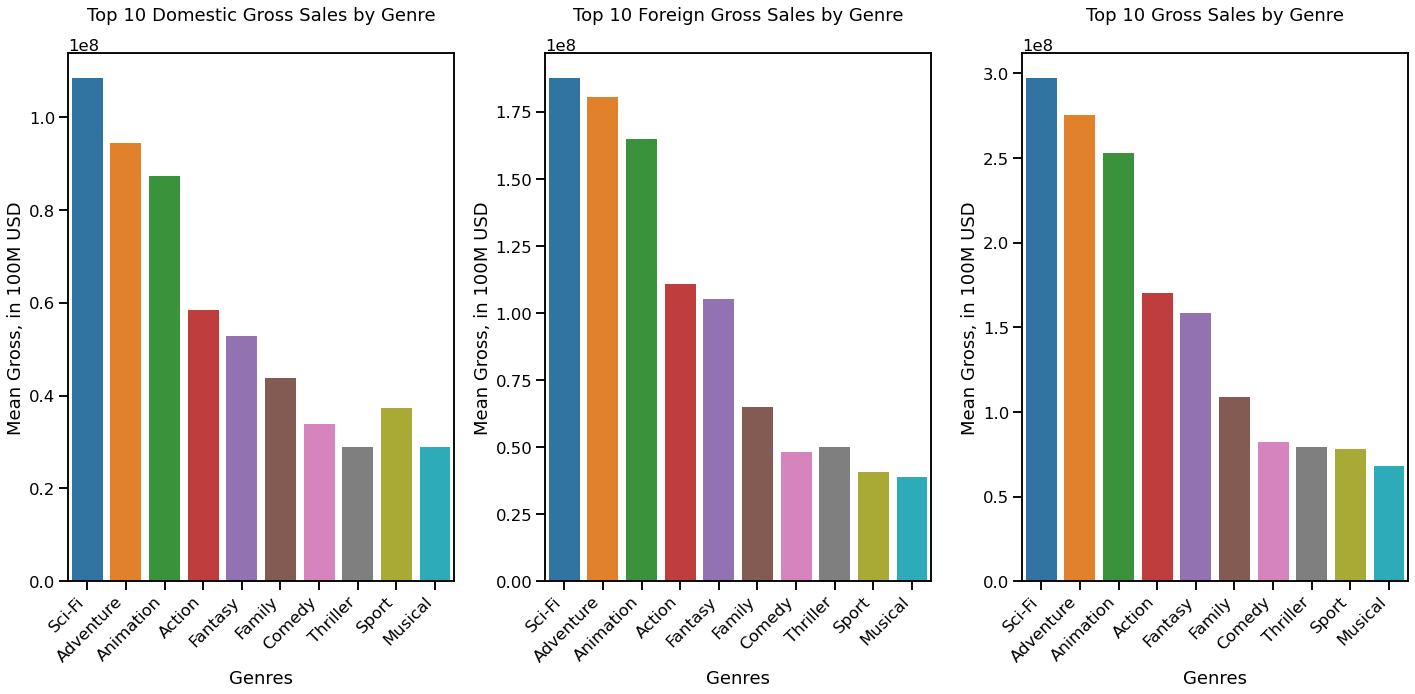

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
sns.barplot(data=df_genres.head(10), x='genres_split', y='domestic_gross',
            ci=68, ax=ax1)
ax1.set_title('Top 10 Domestic Gross Sales by Genre', y=1.05)
ax1.set_xlabel('Genres')
ax1.set_ylabel('Mean Gross, in 100M USD')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')

sns.barplot(data=df_genres.head(10), x='genres_split', y='foreign_gross', 
            ci=68, ax=ax2)
ax2.set_title('Top 10 Foreign Gross Sales by Genre', y=1.05)
ax2.set_xlabel('Genres')
ax2.set_ylabel('Mean Gross, in 100M USD')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right')

sns.barplot(data=df_genres.head(10), x='genres_split', y='total_gross', 
            ci=68, ax=ax3)
ax3.set_title('Top 10 Gross Sales by Genre', y=1.05)
ax3.set_xlabel('Genres')
ax3.set_ylabel('Mean Gross, in 100M USD')
ax3.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right');

plt.tight_layout()

There is a striking similarity between the spread of genres across domestic and foreign markets, suggesting that there is universal appeal for the highest grossing genres of film.

***The key take away is that sci-fi, adventure, and animated films all perform exceptionally well at the box office. The second tier of genres are action, fantasy, and family movies. These seem like the natural genres for Microsoft to focus their energies, despite a rather high bar to entry with many series already being appropriated by other sudios.***

## Exploring the Correlation Between Critical and Commercial Success

In [65]:
ratings_df = pd.read_csv(ratings_url)
prelim(ratings_df)

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

tconst           0
averagerating    0
numvotes         0
dtype: int64

(None, None, None)

This table will be useful once merged with title_basics, for comparing the ratings on IMDB with the gross sales to explore that correlation.

It does not appear that any cleaning needs to be done. Every column has no nulls, and is of the expected dtype.

In [66]:
# merging columns and sanity check
df_cleaned = pd.merge(df_split, ratings_df, left_on='tconst', right_on='tconst')

# dropping columns that are not relevent to our investigation
df_cleaned = df_cleaned.drop(['original_title', 'genres', 'title', 'studio', 'start_year'], axis=1)
df_cleaned.head()

,tconst,primary_title,runtime_minutes,domestic_gross,foreign_gross,year,total_gross,genres_split,averagerating,numvotes
0,tt0315642,Wazir,103.00,"1,100,000.00",0.00,2016,"1,100,000.00",Action,7.10,15378
1,tt0315642,Wazir,103.00,"1,100,000.00",0.00,2016,"1,100,000.00",Crime,7.10,15378
2,tt0315642,Wazir,103.00,"1,100,000.00",0.00,2016,"1,100,000.00",Drama,7.10,15378
3,tt0337692,On the Road,124.00,"744,000.00","8,000,000.00",2012,"8,744,000.00",Adventure,6.10,37886
4,tt0337692,On the Road,124.00,"744,000.00","8,000,000.00",2012,"8,744,000.00",Drama,6.10,37886


In [67]:
# grouping and sorting the df by genre and average rating
df_genres_rating = df_cleaned.groupby('genres_split').mean()
df_genres_rating = df_genres_rating.sort_values('averagerating', ascending=False)
df_genres_rating.reset_index(inplace=True)
df_genres_rating.head()

,genres_split,runtime_minutes,domestic_gross,foreign_gross,year,total_gross,averagerating,numvotes
0,Documentary,89.28,"13,001,777.22","14,571,940.97","2,013.92","27,744,819.63",7.29,"5,504.26"
1,News,70.75,"5,410,350.00","10,800,000.00","2,013.50","16,210,350.00",7.10,306.75
2,Biography,112.26,"20,522,874.38","25,445,334.74","2,014.72","45,968,209.12",6.97,"60,004.00"
3,History,114.93,"18,174,198.50","23,585,532.35","2,014.90","41,906,290.35",6.88,"42,131.28"
4,Sport,114.63,"39,912,515.09","43,747,216.98","2,014.13","83,659,732.08",6.87,"52,873.42"


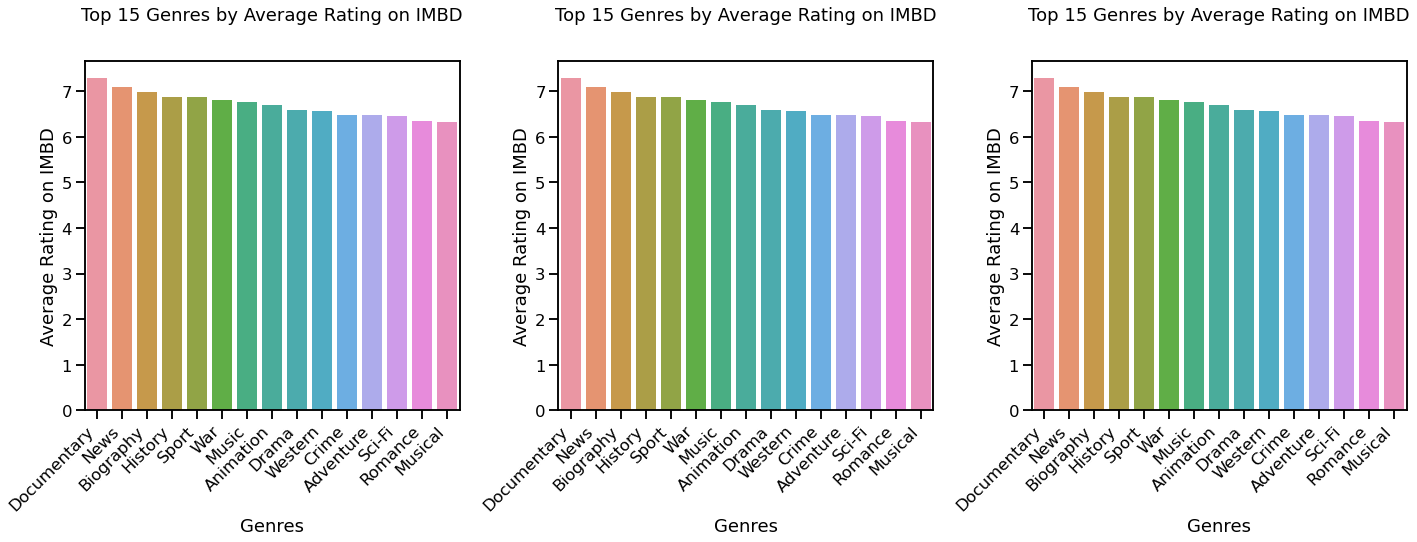

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(data=df_genres_rating.head(15), x='genres_split', y='averagerating',
            ci=68, ax=ax1)
ax1.set_title('Top 15 Genres by Average Rating on IMBD', y=1.1)
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Rating on IMBD')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')

sns.barplot(data=df_genres_rating.head(15), x='genres_split', y='averagerating', 
            ci=68, ax=ax2)
ax2.set_title('Top 15 Genres by Average Rating on IMBD', y=1.1)
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Rating on IMBD')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right')

sns.barplot(data=df_genres_rating.head(15), x='genres_split', y='averagerating', 
            ci=68, ax=ax3)
ax3.set_title('Top 15 Genres by Average Rating on IMBD', y=1.1)
ax3.set_xlabel('Genres')
ax3.set_ylabel('Average Rating on IMBD')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45, ha='right')
plt.tight_layout()

The above plots show that the critical success of a genre, as measured by ratings on IMDB, does not mirror the success of a genre when measured by total sales.

This suggests that critical success does not always correlate with box office success.

In [70]:
#plotting correlation between total_gross and averagerating
df_cleaned.corr(method='pearson')

,runtime_minutes,domestic_gross,foreign_gross,year,total_gross,averagerating,numvotes
runtime_minutes,1.00,0.15,0.18,0.04,0.18,0.17,0.26
domestic_gross,0.15,1.00,0.86,0.02,0.94,0.16,0.68
foreign_gross,0.18,0.86,1.00,0.05,0.98,0.14,0.61
year,0.04,0.02,0.05,1.00,0.04,0.05,-0.13
total_gross,0.18,0.94,0.98,0.04,1.00,0.15,0.66
averagerating,0.17,0.16,0.14,0.05,0.15,1.00,0.32
numvotes,0.26,0.68,0.61,-0.13,0.66,0.32,1.00


The strongest correlations in the above matrix are generally obvious, and non-informative. For instance, a strong correlation between the number of votes and the domestic gross makes intuitive sense -- more people seeing a movie naturally leads to more people rating it on IMDB.

Other correlations, while weaker, may be more instructive. Below are plots of some of the more interesting correlations in this data frame:

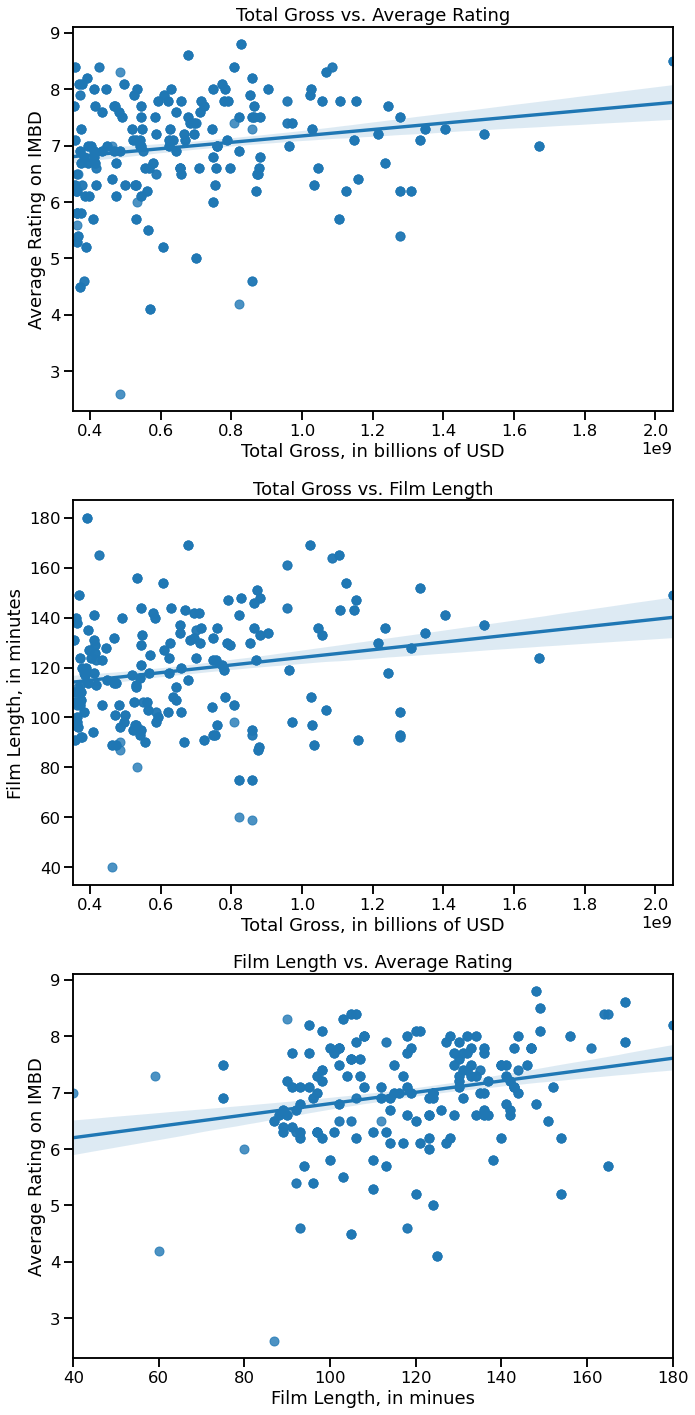

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
sns.regplot(data=(df_cleaned.sort_values('total_gross', ascending=False).head(500)), 
                                 x='total_gross', y='averagerating', ax=ax1)
ax1.set_title('Total Gross vs. Average Rating')
ax1.set_xlabel('Total Gross, in billions of USD')
ax1.set_ylabel('Average Rating on IMBD')

sns.regplot(data=(df_cleaned.sort_values('total_gross', ascending=False).head(500)), 
                                 x='total_gross', y='runtime_minutes', ax=ax2)
ax2.set_title('Total Gross vs. Film Length')
ax2.set_xlabel('Total Gross, in billions of USD')
ax2.set_ylabel('Film Length, in minutes')

sns.regplot(data=(df_cleaned.sort_values('total_gross', ascending=False).head(500)), 
                                 x='runtime_minutes', y='averagerating', ax=ax3)
ax3.set_title('Film Length vs. Average Rating')
ax3.set_xlabel('Film Length, in minues')
ax3.set_ylabel('Average Rating on IMBD');
plt.tight_layout()

There are no suggestions that can be derived from this exploration, but it is worth highlighting a weak, positive correlation in the above charts.

## Examining ROI by Genre

Knowing the budget for these movies can provide a ballpark estimate on the ROI of movies, which can be then sorted by genre to give actionable data.


In [72]:
budget_df = pd.read_csv(budget_url)
prelim(budget_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

(None, None, None)

The budget_df contains data about the release date, movie title, production budget, and box office gross. Since we already have cleaned gross data, we will be merging only the production budget and movie name with our existing df.

Additionally we will have to clean and recast the production_budget column.

In [73]:
# merge dfs and clean, recast budget column as float, dropping excess columns
# and sanity check
df = pd.merge(df_cleaned, budget_df, left_on='primary_title', right_on='movie')
df['production_budget'] = df['production_budget'].str.strip(
    '$').str.replace(',','').astype(float)
df = df.drop(['id', 'release_date', 'movie', 'domestic_gross_y',
              'worldwide_gross'], axis=1)
df.sort_values('production_budget', ascending=False).head()

,tconst,primary_title,runtime_minutes,domestic_gross_x,foreign_gross,year,total_gross,genres_split,averagerating,numvotes,production_budget
855,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.00,"241,100,000.00","804,600,000.00",2011,"1,045,700,000.00",Adventure,6.60,447624,"410,600,000.00"
856,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.00,"241,100,000.00","804,600,000.00",2011,"1,045,700,000.00",Fantasy,6.60,447624,"410,600,000.00"
854,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.00,"241,100,000.00","804,600,000.00",2011,"1,045,700,000.00",Action,6.60,447624,"410,600,000.00"
2564,tt2395427,Avengers: Age of Ultron,141.00,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Action,7.30,665594,"330,600,000.00"
2565,tt2395427,Avengers: Age of Ultron,141.00,"459,000,000.00","946,400,000.00",2015,"1,405,400,000.00",Adventure,7.30,665594,"330,600,000.00"


In [74]:
# combining the 'music' and 'musical' genres
df['genres_split'] = df['genres_split'].str.replace('Musical', 'Music')

# grouping by genre and aggregating by mean

df_avg = df.groupby('genres_split').mean()

# creating new column to represent ROI

df_avg['ROI'] = ((df_avg['total_gross'] - df_avg['production_budget']) / df_avg['production_budget']) * 100

# ordering by ROI

df_avg = df_avg.sort_values('ROI', ascending=False)
df_avg.reset_index(inplace=True)

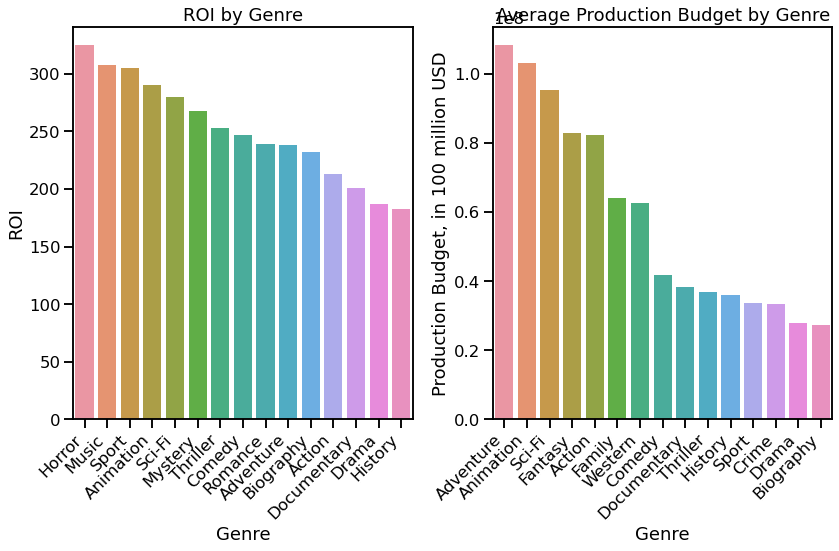

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))

sns.barplot(data=df_avg.head(15), x='genres_split', y="ROI", ax=ax1)
ax1.set_title('ROI by Genre')
ax1.set_xlabel('Genre')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')

sns.barplot(data=df_avg.sort_values('production_budget', ascending=False).head(15),
                                    x ='genres_split', y='production_budget', ax=ax2)
ax2.set_title('Average Production Budget by Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Production Budget, in 100 million USD')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, ha='right');
plt.tight_layout()

In [78]:
# comparing ROI and production_budget by genre
df_avg.groupby('genres_split')['ROI', 
                               'production_budget'].mean().sort_values('production_budget')

<ipython-input-78-1d0a97f24ccd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg.groupby('genres_split')['ROI',


,ROI,production_budget
genres_split,,
News,71.00,"18,900,000.00"
War,63.12,"20,692,307.69"
Romance,239.00,"21,492,039.11"
Horror,324.67,"21,681,468.74"
Music,307.84,"22,250,000.00"
Mystery,267.43,"25,408,829.04"
Biography,232.30,"27,419,418.98"
Drama,187.38,"27,955,160.47"
Crime,170.02,"33,374,279.87"


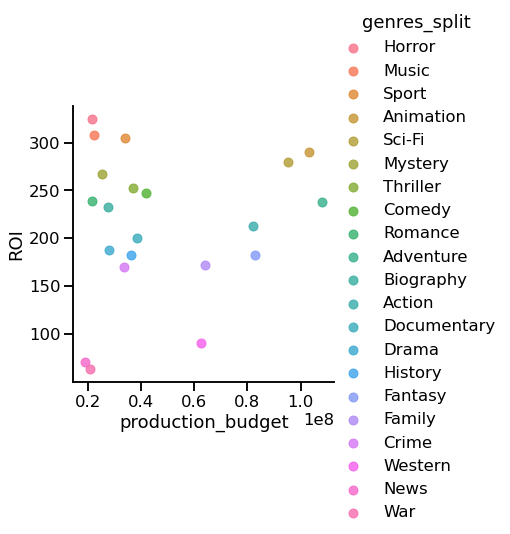

In [79]:
# plotting relationship between ROI, production_budget and genre
sns.lmplot(x="production_budget", y="ROI", data=df_avg, fit_reg=False, hue='genres_split');

The intersection of lower production budget and higher ROI (the upper left quadrant of the above chart) is a great place for Microsoft to begin its movie studio business. Lower risk and greater reward is a smart, efficient way to enter a crowded market.


## Conclusions

In this project I have analyzed, cleaned, and interpreted data in order to make suggestions about what types of movies Microsoft should be making for the launch of their new movie studio.

The two primary metrics used to measure success in this project are 'total gross sales' (domestic box office gross + foreign box office gross) and return on investment ((total gross sales - production budget) / production budget).

Using these metrics I have determined that the genres of movie with the highest total gross sales are:

Sci-Fi\
Adventure\
Animation

However, during the investigation of top grossing films, it is clear that the majority of these movies are part of a series. Unless there is a home-run series that Microsoft already has in its back pocket, it is unreasonable to expect that a new series would immediately be a commercial success.

Upon examining the ROI plotted against production budget, it becomes clear that certain genres of movie have a higher ROI than others. These genres, having the most 'bang for the buck are:

Horror\
Musicals\
Sport\
Animation

These are the types of movies that I think it is most prudent for Microsoft to make. Animation, especially, has a very broad appeal, and does well as a genre in terms of commercial success.


## For Further Exploration

COVID-19 certainly changed the way that people consume movies. Can we generate any insights from looking at the increase in pay-per-view and streaming services during the pandemic? How valuable is that segement of the market once movie theaters open at full capacity again?
